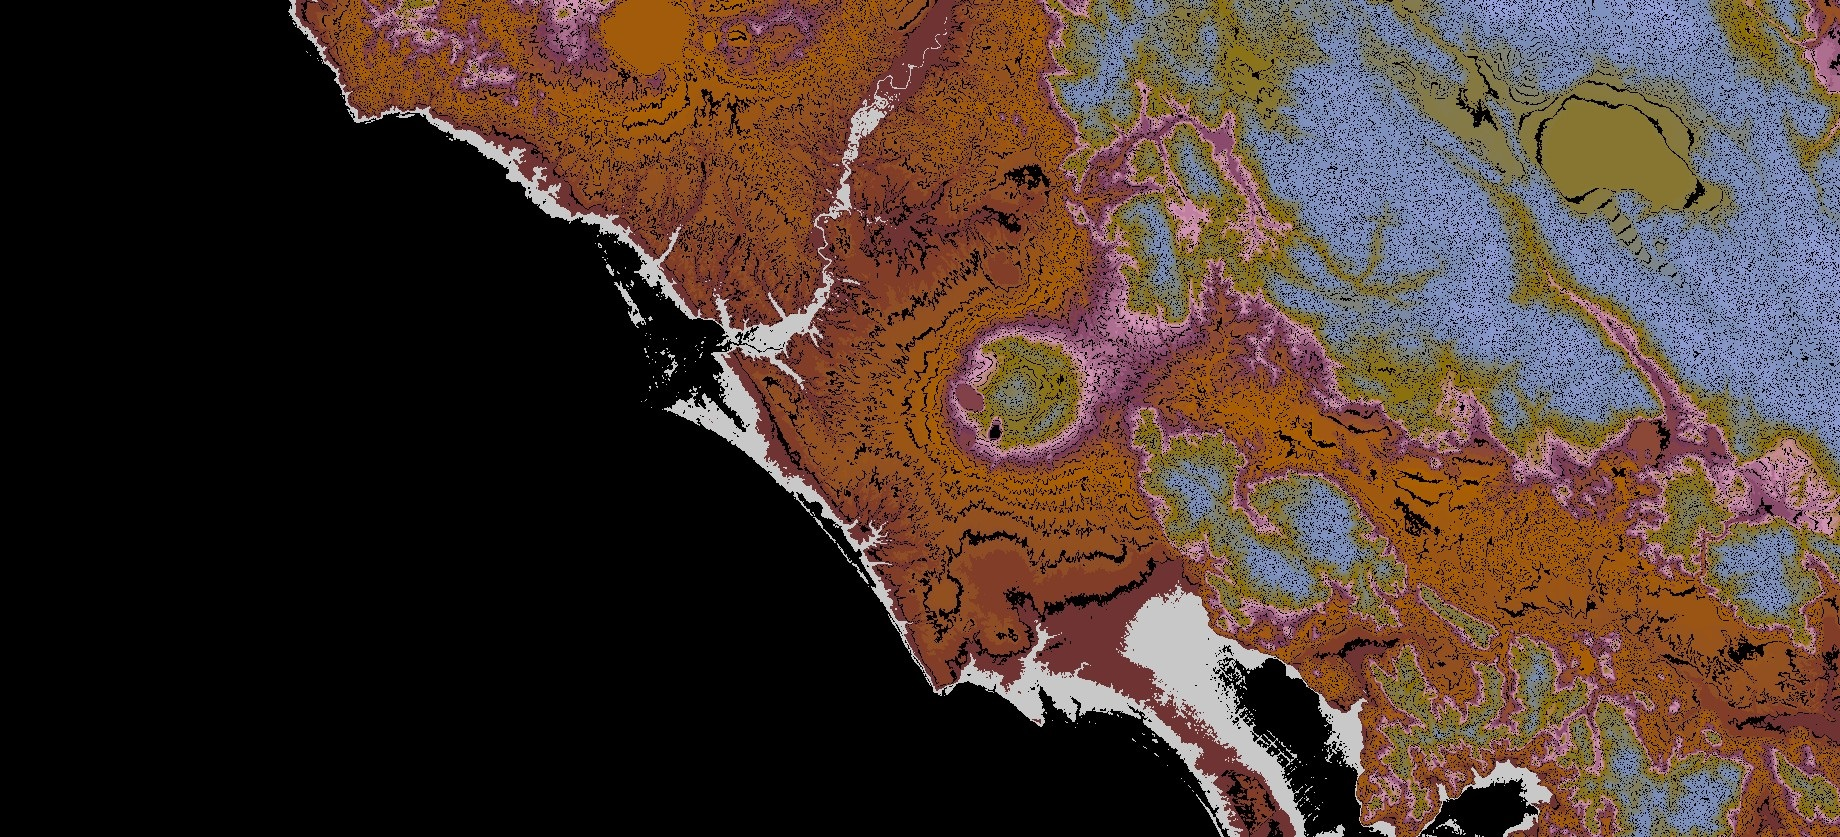

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  

origin = cv2.imread('/content/dem.jpg')
cv2_imshow(origin)

In [2]:
image = cv2.imread('/content/dem.jpg')
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [3]:
cont = cv2.drawContours(image, contours, -1, (0,255,0), 3)

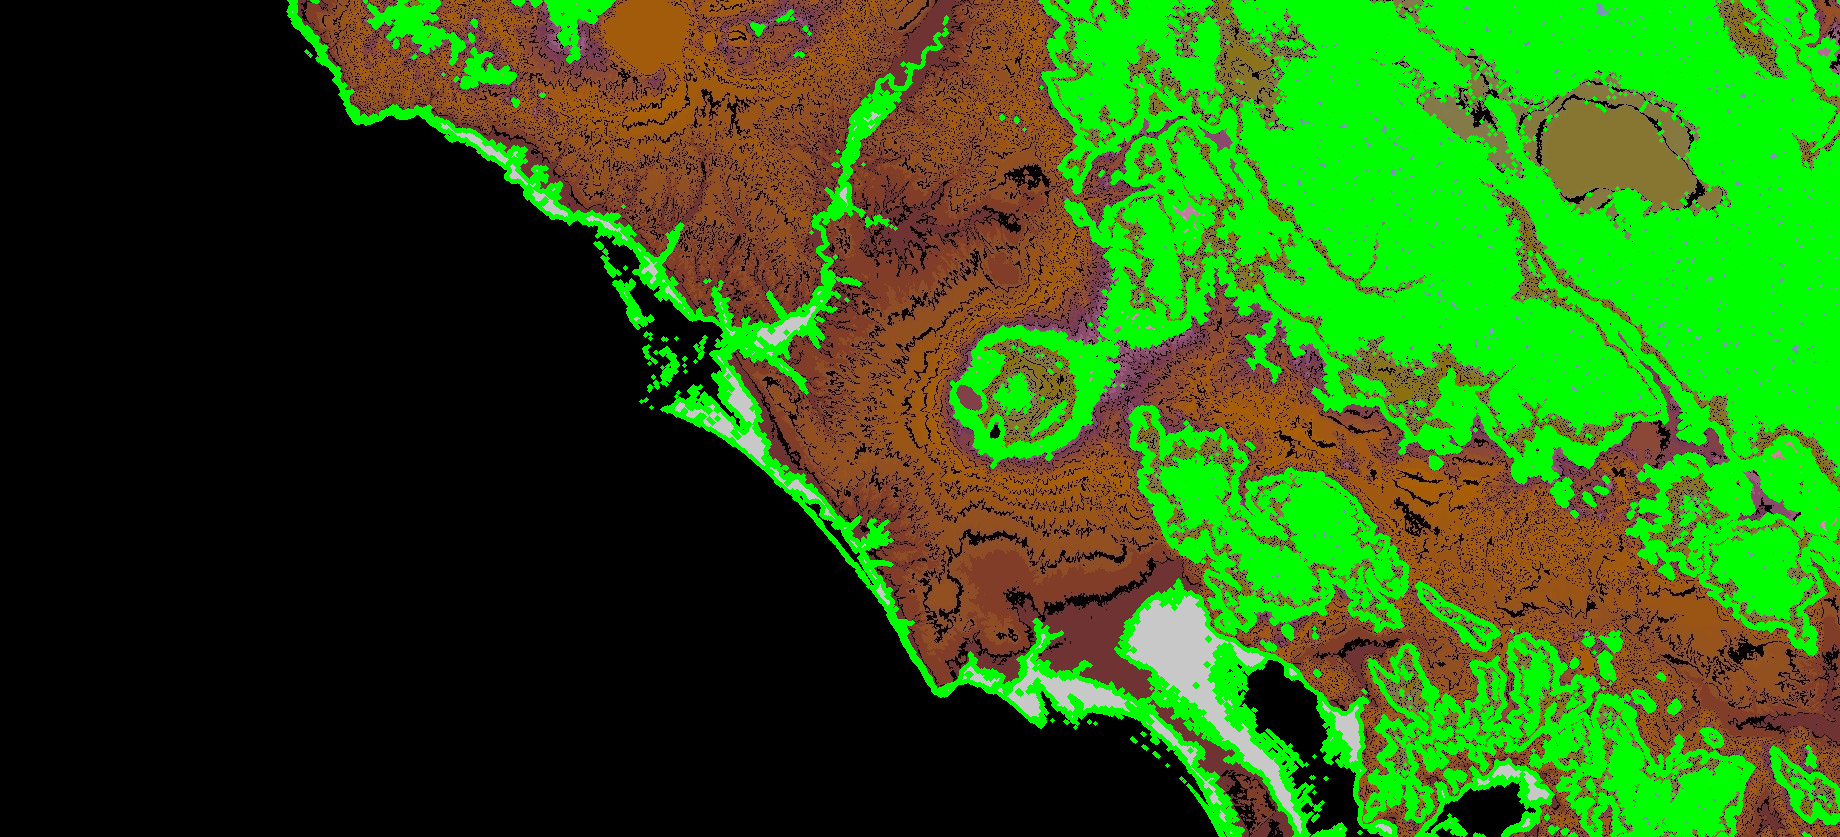

True

In [4]:
cv2_imshow(cont)
cv2.imwrite('count.png', cont)

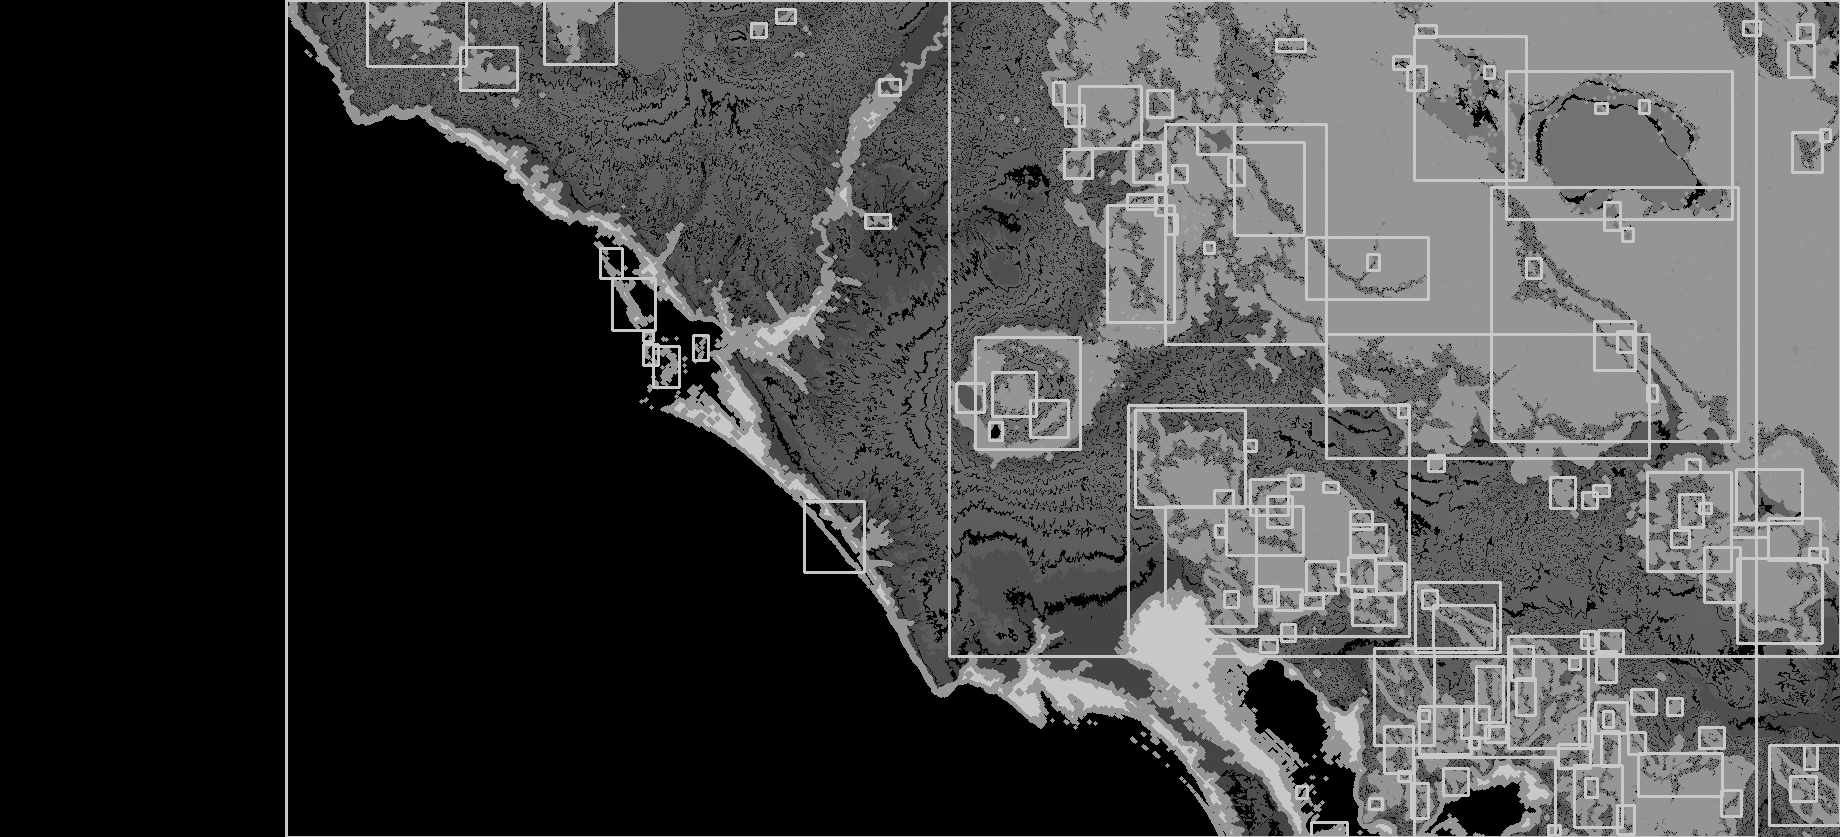

In [5]:
BLACK_THRESHOLD = 200
THIN_THRESHOLD = 10

im = cv2.imread('/content/count.png', 0)
ret, thresh = cv2.threshold(im, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 1, 3)
idx = 0
for cnt in contours:
    idx += 1
    x, y, w, h = cv2.boundingRect(cnt)
    roi = im[y:y + h, x:x + w]
    if h < THIN_THRESHOLD or w < THIN_THRESHOLD:
        continue
    #cv2.imwrite(str(idx) + '.png', roi)
    cv2.rectangle(im, (x, y), (x + w, y + h), (200, 0, 0), 2)
cv2_imshow(im)